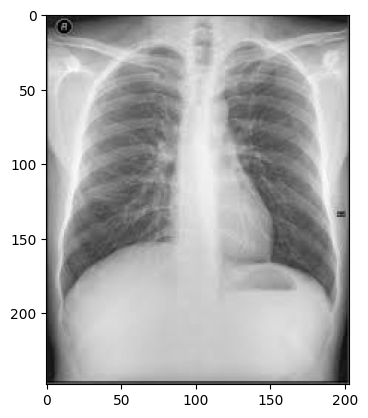

In [9]:
#importer les bibliotheques
import matplotlib.pyplot  as plt
import numpy as np
from PIL import Image
#importer l'image
image = Image. open("images1.jpg")

imgGray = image.convert("L")
plt.imshow(imgGray,cmap="gray")




In [10]:
img=np.array(imgGray)#transfert l image au type array.
img.shape
N=img.shape[0]
M=img.shape[1]
imgk=np.array(imgGray)#Crée un array initialisé par les valeurs de l’image img.
filter=[[pow(2,7),pow(2,6),pow(2,5)],[pow(2,0),0,pow(2,4)],[pow(2,1),pow(2,2),pow(2,3)]]#Declarer la matrice des puissance de 2 pour le codage décimale.

filter=np.array(filter)
for i in range(1,N-1):
    for j in range(1,M-1):
        voisinage=img[i-1:i+2,j-1:j+2]#Extrait les voisinages du pixel. 
        voisinage=np.array(voisinage)
        center=img[i][j]
        #Faire la comparaison entre le pixel central est les pixels voisins.
        for k in range(3):
            for c in range(3):
                if voisinage[k][c]>=center:
                    voisinage[k][c]=1
                else:
                    voisinage[k][c]=0
        #Calculer le code décimal
        r=voisinage*filter
        r=np.sum(r)

        imgk[i][j]=r


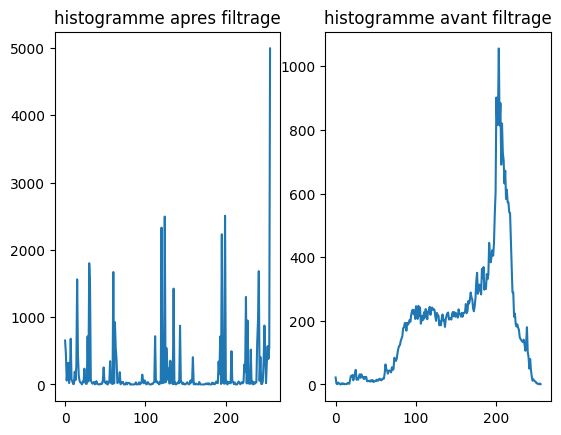

In [15]:
#cree 2 histogramme l'un pour l image principale et le deuxieme pour l image apres traitement

#l histogramme d l'image initial
h1=np.zeros(256)

for i in range(1,N-1):
    for j in range(1,M-1):
        c=img[i][j]
        h1[c]=h1[c]+1
#l'histogramme de l'image final
h=np.zeros(256)

for i in range(1,N-1):
    for j in range(1,M-1):
        c=imgk[i][j]
        h[c]=h[c]+1
#affichage des histogramme
plt.subplot(121)
plt.title("histogramme apres filtrage")
plt.plot(h)
plt.subplot(122)
plt.title("histogramme avant filtrage")
plt.plot(h1)


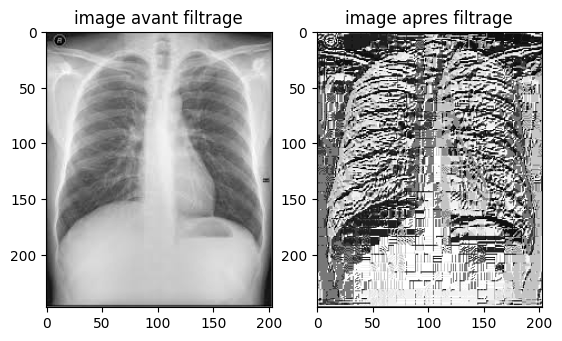

In [12]:
#affichage d'image avant est apres le traitement 
plt.subplot(121)
plt.title("image avant filtrage")
plt.imshow(img,cmap="gray")
plt.subplot(122)
plt.title("image apres filtrage")
plt.imshow(imgk,cmap="gray")